In [498]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Анализ всех данных

In [499]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### 1.1 Точечный график

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

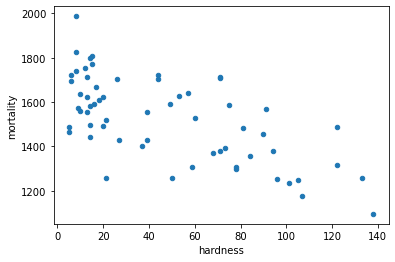

In [500]:
df.plot(kind='scatter', x='hardness', y='mortality')

### 1.2 Корреляция

In [501]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [502]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Задача: ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Ответ: видна обратная средняя связь.

### 1.3 Регрессия

In [503]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [504]:
X = df[['hardness']]
y = df['mortality']

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [506]:
X_train.shape

(42, 1)

In [507]:
y_train.shape

(42,)

In [508]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [509]:
model.coef_

array([-3.13167087])

In [510]:
model.intercept_

1668.9722977277095

In [511]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

### 1.4 Значение коэффициента детерминации

In [512]:
model.score(X_test, y_test)

0.5046490611017092

### 1.5 Построение графика остатков

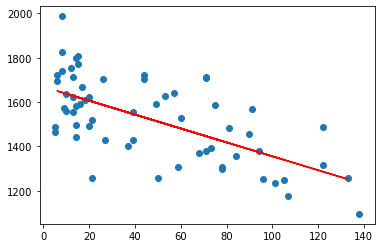

In [513]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, c='r')

## 2. Анализ по группам

In [514]:
df_north = df.loc[df['location'] == 'North']
df_north.shape

(35, 5)

In [515]:
df_south = df.loc[df['location'] == 'South']
df_south.shape

(26, 5)

### 2.1 North

### 2.1.1 Точечный график

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

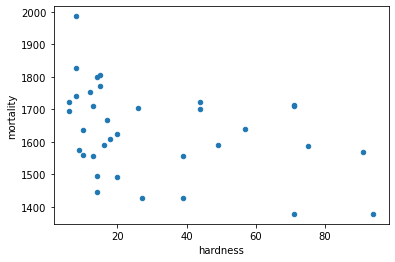

In [516]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

### 2.1.2 Корреляция

In [517]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [518]:
df_north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


Для севера связь слабее, чем на всех данных.

### 2.1.3 Регрессия

In [519]:
X = df_north[['hardness']]
y = df_north['mortality']

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [521]:
X_train.shape

(24, 1)

In [522]:
y_train.shape

(24,)

In [523]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [524]:
model.coef_

array([-1.97686226])

In [525]:
model.intercept_

1688.150229031281

In [526]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

### 2.1.4 Значение коэффициента детерминации

In [527]:
model.score(X_test, y_test) # слабая прогнозная модель

0.018885304285745863

### 2.1.5 Построение графика остатков

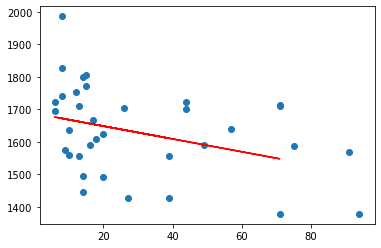

In [528]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, c='r')

### 2.2 South

### 2.2.1 Точечный график

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

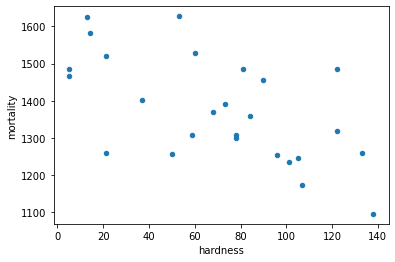

In [529]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

### 2.2.2 Корреляция

In [530]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [531]:
df_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


Связь обратная средняя

### 2.2.3 Регрессия

In [532]:
X = df_south[['hardness']]
y = df_south['mortality']

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [595]:
X_train.shape

(23, 1)

In [596]:
y_train.shape

(23,)

In [597]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [598]:
model.coef_

array([-2.1645425])

In [599]:
model.intercept_

1529.143749365289

In [600]:
y_pred = model.predict(X_test)
y_pred

array([1265.06956433, 1518.32103686, 1301.86678684])

### 2.2.4 Значение коэффициента детерминации

In [601]:
model.score(X_test, y_test)

0.7724212353112103

При обучении на 90% данных прогнозная модель показывает хороший коэффициент детерминации, а при 85% с отрицательным значением.

Предположу, что для построения вменяемой модели маловато данных.

### 2.2.5 Построение графика остатков

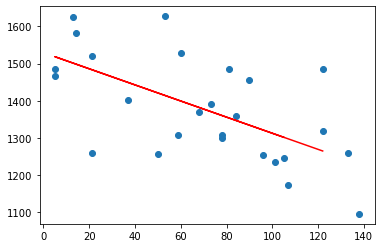

In [602]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, c='r')